<a href="https://colab.research.google.com/github/elenakp-user/Efluentes-Liquidos-IBAMA---Data-visualization/blob/main/Efluentes_L%C3%ADquidos_(IBAMA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Efluentes líquidos**

Dados do IBAMA

In [ ]:
import pandas as pd
import numpy as np

data  = pd.read_csv('/content/relatorio.csv', delimiter = ';', on_bad_lines='skip')
pd.set_option('display.max_columns', None)

data

ntagem de veículos rodoviários e ferroviários, peças e acessórios  \
01.511.345/0001-72 TS TECH DO BRASIL LTDA          SAO PAULO    LEME     6.0 Indústria de Material de Transporte 1.0  Fabricação e montagem de veículos rodoviários ...                  
                                                                                                                 1.0  Fabricação e montagem de veículos rodoviários ...                  
01.511.345/0002-53 T S TECH DO BRASIL LTDA         SAO PAULO    LEME     NaN NaN                                 NaN                                                NaN                  
                                                                                                                 NaN                                                NaN                  
01.511.345/0003-34 TS TECH DO BRASIL LTDA          SAO PAULO    LEME     NaN NaN                                 NaN                                                NaN                  
...                                                                                                                                                                 ...                  
03.334.595/0001-00 MBV - MINERAÇÃO BELA VISTA LTDA MINAS GERAIS CONTAGEM 1.0 Extração e Tratamento de Minerais   2.0  Lavra a céu aberto, inclusive de aluvião, com ...                  
                                                                                                                 2.0  Lavra a céu aberto, inclusive de aluvião, com ...                  
                                                                                                                 2.0  Lavra a céu aberto, inclusive de aluvião, com ...                  
                                                                                                                 2.0  Lavra a céu aberto, inclusive de aluvião, com ...                  
                                                                                                                 2.0  Lavra a céu aberto, inclusive de aluvião, com ...                  

                                                                                                                      2020  \
01.511.345/0001-72 TS TECH DO BRASIL LTDA          SAO PAULO    LEME     6.0 Indústria de Material de Transporte 1.0  2021   
                                                                                                                 1.0  2022   
01.511.345/0002-53 T S TECH DO BRASIL LTDA         SAO PAULO    LEME     NaN NaN                                 NaN  2007   
                                                                                                                 NaN  2008   
01.511.345/0003-34 TS TECH DO BRASIL LTDA          SAO PAULO    LEME     NaN NaN                                 NaN  2008   
...                                                                                                                    ...   
03.334.595/0001-00 MBV - MINERAÇÃO BELA VISTA LTDA MINAS GERAIS CONTAGEM 1.0 Extração e Tratamento de Minerais   2.0  2012   
                                                                                                                 2.0  2012   
                                                                                                                 2.0  2013   
                                                                                                                 2.0  2013   
                                                                                                                 2.0  2014   

                                                                                                                          15,08  \
01.511.345/0001-72 TS TECH DO BRASIL LTDA          SAO PAULO    LEME     6.0 Indústria de Material de Transporte 1.0      30,13   
                                                                                                             

https://dadosabertos.ibama.gov.br/dados/RAPP/efluentesLiquidos/relatorio.csv


In [ ]:
data.columns.values

array(['CNPJ', 'Razão Social', 'Estado', 'Município',
       'Código da Categoria', 'Categoria de Atividade',
       'Código do Detalhe', 'Detalhe', 'Ano', 'Quantidade',
       'Desc. Monitoramento Utilizado', 'Eficiência do tratamento',
       'Tipo de Tratamento', 'Nível de Tratamento',
       'Compart. Ambiental da Emissão', 'Tipo de Emissão',
       'Tipo Corpo Receptor', 'Classe do Corpo Receptor',
       'Nome do Corpo Hídrico', 'Latitude', 'Longitude', 'Corpo Receptor',
       'Qual?', 'Empresa Receptora do Efluente',
       'Tipo de Emissão Para o Solo', '(Se outro) Qual?',
       'Situação Cadastral'], dtype=object)

In [ ]:
df = data['Categoria de Atividade']
df.value_counts()

Indústria de Produtos Alimentares e Bebidas                             58167
Indústria Química                                                       35568
Indústria de Produtos Minerais Não Metálicos                            26448
Indústria Metalúrgica                                                   25838
Serviços de Utilidade                                                   24213
Extração e Tratamento de Minerais                                       23646
Indústria Mecânica                                                      18425
Indústria Têxtil, de Vestuário, Calçados e Artefatos de Tecidos         17306
Indústria de Madeira                                                    12396
Indústria de Produtos de Matéria Plástica.                              10965
Indústria de material Elétrico, Eletrônico e Comunicações                7077
Indústrias Diversas                                                      6358
Indústria de Material de Transporte                             

In [ ]:
est = data[(data['Estado'] == 'BAHIA') & (data['Categoria de Atividade'])]
est['Quantidade'] = est['Quantidade']. fillna("0.00")

pd.set_option('display.max_rows', None)
est

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt


lista_val_abs_quant = []


def val_abs_quant(estado):
  est = data[(data['Estado'] == estado) & (data['Categoria de Atividade'] == 'Indústria Química')]


  est['Quantidade'] = est['Quantidade']. fillna("0.00")
  est['Quantidade'] = est['Quantidade'].str.replace(',', '.')
  valores_inteiros = []
  valores_decimais = []
  for val in est['Quantidade']:
    if val[:-2] != '0.':                  #valores inteiros
      val = val[:-3]
      val = re.sub(r'[^\w\s]','',val)     #retirando pontuação indesejada. Ex: 1.000 -> 1000
      valores_inteiros.append(int(val))
    else:                                 #valores decimais
      valores_decimais.append(float(val))
  soma_nums_int = sum(valores_inteiros)
  soma_nums_dec = int(sum(valores_decimais))
  soma_total = soma_nums_int + soma_nums_dec
  lista_val_abs_quant.append(soma_total)
  print(soma_total)
val_abs_quant('SAO PAULO')
val_abs_quant('SANTA CATARINA')
val_abs_quant('MINAS GERAIS')
val_abs_quant('PARANA')
val_abs_quant('CEARA')
val_abs_quant('BAHIA')




y = np.array(lista_val_abs_quant)
mylabels = ["SAO PAULO", "SANTA CATARINA", "MINAS GERAIS", "PARANA", "CEARA", "BAHIA"]


plt.pie(y, labels = mylabels)
plt.show()


KeyError: ignored

In [ ]:
trat = data['Tipo de Tratamento']
trat = trat.value_counts().sort_index()
trat.drop( labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
trat.plot(kind='pie', autopct='%.1f%%')


In [ ]:
CdA = data['Categoria de Atividade']
CdA = CdA.value_counts().sort_index()
CdA.plot(kind='pie')

<Axes: ylabel='Estado'>

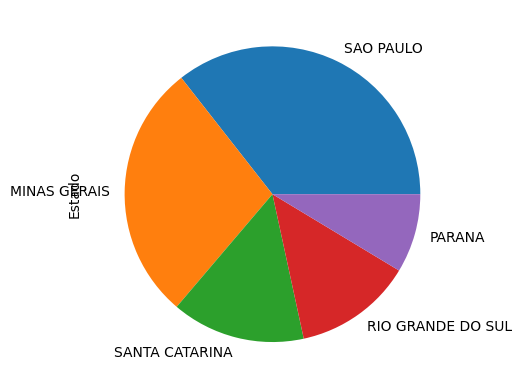

In [ ]:
import numpy as np

CdA = data['Estado']
CdA = CdA.value_counts().sort_values(ascending=False)

CdA.iloc[0:5].plot(kind='pie')

In [ ]:
import numpy as np

CdA = data['Município']
CdA = CdA.value_counts().sort_values(ascending=False)

CdA.iloc[0:5].plot(kind='pie')

KeyError: ignored

In [ ]:
data.fillna(value = '-')

In [ ]:
d2020 = pd.read_csv('https://dadosabertos.ana.gov.br/datasets/0ac689335d1641d2b88a32312d22c9ac_0.csv?outSR=%7B%22latestWkid%22%3A4674%2C%22wkid%22%3A4674%7D')
d2020

,X,Y,OBJECTID,ETE_CD,ETE_NM,ETE_ACH_CD,ETE_AA_OPERACAO,ETE_DS_STATUS,ETE_DS_INTEGRADO,ETE_DS_TOTAL,ETE_DS_TIPOLOGIA,ETE_NM_CORPORECEPTOR,ETE_QT_POPPROJ,ETE_PC_REMOCAODBO,ETE_PC_REMOCAOP,ETE_PC_REMOCAON,ETE_MUN_CD_IBGE,ETE_NM_REGIAOMETROP,ETE_DS_TIPOLOGRESUMIDA
0,-54.302599,-22.486521,1,5005103_ETE_2,ETE Jateí II,8638287,0,Ativa,Não,Sim,"Reator Anaeróbio (RAFA, RALF, UASB, DAFA)",,0,0.65,0.0,0.0,5005103,,RAN
1,-56.435542,-14.399347,2,5103502_ETE_1,ETE COHAB Morumbi,89999466,0,Ativa,Não,Sim,Lagoa Facultativa,,0,0.75,0.0,0.0,5103502,,LAG
2,-47.342633,-2.974281,3,1505502_ETE_2,ETE Morada dos Ventos,714263,0,Ativa,Não,Sim,Reator Anaeróbio + Lodos Ativados,,0,0.85,0.0,0.0,1505502,,RAN
3,-32.428464,-3.847619,4,2605459_ETE_1,ETE Boldró,0,0,Ativa,Não,Sim,Lagoa Facultativa,,0,0.78,0.0,0.0,2605459,,LAG
4,-45.558484,-20.122577,5,3135308_ETE_2,ETE Capoeirão,7699582,0,Ativa,Não,Sim,Lagoa Facultativa,Córrego Gotano,0,0.78,0.0,0.0,3135308,,LAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,-40.673170,-19.533551,3770,3201506_ETE_4,ETE Frisa SA (Industrial),7761713,0,Ativa,Não,Sim,Lagoa Aerada + Lagoa de Decantação/Facultativa...,Rio Doce,0,0.82,0.0,0.0,3201506,,LAG
3770,-49.204088,-16.443030,3771,5214507_ETE_1,ETE Nerópolis,86952943,2015,Em construção/ampliação,Não,Sim,Reator Anaeróbio + Filtro Aeróbio + Decantador,Ribeirão Capivara,29907,0.90,0.0,0.0,5214507,,RAN
3771,-48.275773,-15.692222,3772,5200258_ETE_2,ETE Águas Lindas - Nova,648494,2018,Ativa,Não,Sim,Reator Anaeróbio + Lagoas Facultativas/Maturaç...,Córrego Paulista,87352,0.85,0.0,0.0,5200258,,RAN
3772,-44.827434,-20.128841,3773,3122306_ETE_4,ETE Jardim Canindés,76989114,2019,Ativa,Não,Sim,Fossa Séptica + Filtro Anaeróbio/Biológico,Córrego da Divisa,4944,0.70,0.0,0.0,3122306,,SIM


In [ ]:
import numpy as np

pd.set_option('display.max_rows', None)

jvll = data.loc[data['Município'].str.contains("Joinville", case=False)]

jvll


In [ ]:
cidade = input('Cidade: ')
#pd.set_option('display.max_rows', None)

cidade = data.loc[data['Município'].str.contains(cidade, case=False)]

cidade

Cidade: chapeco


KeyError: ignored

In [ ]:
atv = data.loc[data['Categoria de Atividade'].str.contains('Serviços de Utilidade	', case=False)]


atv

In [ ]:
jvll_Eficiencia = data['Eficiência do tratamento']
jvll_Eficiencia = jvll_Eficiencia.value_counts().sort_values(ascending=False)
#jvll_Eficiencia.pop()

jvll_Eficiencia

100%      131155
90%        53087
80%        36619
95%        35288
98%        17153
           ...  
96.31%         1
987%           1
720%           1
95.7%          1
90.12%         1
Name: Eficiência do tratamento, Length: 226, dtype: int64

In [ ]:
jvll_Eficiencia = jvll['Eficiência do tratamento']
jvll_Eficiencia = jvll_Eficiencia.value_counts().sort_index(ascending=False)

for i in range(0, len(jvll_Eficiencia+1)):
  if jvll_Eficiencia[i] < 9 or jvll_Eficiencia[i] < 9:
    jvll_Eficiencia=jvll_Eficiencia.drop(jvll_Eficiencia.index[i])


print(jvll_Eficiencia)


IndexError: ignored

In [ ]:
import pandas as pd
import requests
import folium

url = (
    "https://github.com/fititnt/gis-dataset-brasil"
)

state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

NameError: ignored

In [ ]:
import pandas as pd
import requests
import folium

response = requests.get(url = 'https://raw.githubusercontent.com/fititnt/gis-dataset-brasil/master/uf/geojson/uf.json')
if response.status_code == 200:
  state_geo = response.json()

type(state_geo)

dict

In [ ]:
import pandas as pd
import requests
import folium
import re
import numpy as np
import matplotlib.pyplot as plt

response = requests.get(url = 'https://raw.githubusercontent.com/fititnt/gis-dataset-brasil/master/uf/geojson/uf.json')
if response.status_code == 200:
  state_geo = response.json()


lista_val_abs_quant = []


def val_abs_quant(estado):
  est = data[(data['Estado'] == estado) & (data['Categoria de Atividade'] == 'Indústria de Produtos Alimentares e Bebidas')]


  est['Quantidade'] = est['Quantidade']. fillna("0.00")
  est['Quantidade'] = est['Quantidade'].str.replace(',', '.')
  valores_inteiros = []
  valores_decimais = []
  for val in est['Quantidade']:
    if val[:-2] != '0.':                  #valores inteiros
      val = val[:-3]
      val = re.sub(r'[^\w\s]','',val)     #retirando pontuação indesejada. Ex: 1.000 -> 1000
      valores_inteiros.append(int(val))
    else:                                 #valores decimais
      valores_decimais.append(float(val))
  soma_nums_int = sum(valores_inteiros)
  soma_nums_dec = int(sum(valores_decimais))
  soma_total = soma_nums_int + soma_nums_dec
  lista_val_abs_quant.append(soma_total)

val_abs_quant('ACRE')
val_abs_quant('ALAGOAS')
val_abs_quant('AMAPA')
val_abs_quant('AMAZONAS')
val_abs_quant('BAHIA')
val_abs_quant('CEARA')
val_abs_quant('DISTRITO FEDERAL')
val_abs_quant('ESPIRITO SANTO')
val_abs_quant('GOIAS')
val_abs_quant('MARANHAO')
val_abs_quant('MATO GROSSO')
val_abs_quant('MATO GROSSO DO SUL')
val_abs_quant('MINAS GERAIS')
val_abs_quant('PARA')
val_abs_quant('PARAIBA')
val_abs_quant('PARANA')
val_abs_quant('PERNAMBUCO')
val_abs_quant('PIAUI')
val_abs_quant('RIO DE JANEIRO')
val_abs_quant('RIO GRANDE DO NORTE')
val_abs_quant('RIO GRANDE DO SUL')
val_abs_quant('RONDONIA')
val_abs_quant('RORAIMA')
val_abs_quant('SANTA CATARINA')
val_abs_quant('SAO PAULO')
val_abs_quant('SERGIPE')
val_abs_quant('TOCANTINS')


state_data = {'Estado': {0: 'ACRE',
                        1: 'ALAGOAS',
                        2: 'AMAPA',
                        3: 'AMAZONAS',
                        4: 'BAHIA',
                        5: 'CEARA',
                        6: 'DISTRITO FEDERAL',
                        7: 'ESPIRITO SANTO',
                        8: 'GOIAS',
                        9: 'MARANHAO',
                        10: 'MATO GROSSO',
                        11: 'MATO GROSSO DO SUL',
                        12: 'MINAS GERAIS',
                        13: 'PARA',
                        14: 'PARAIBA',
                        15: 'PARANA',
                        16: 'PERNAMBUCO',
                        17: 'PIAUI',
                        18: 'RIO DE JANEIRO',
                        19: 'RIO GRANDE DO NORTE',
                        20: 'RIO GRANDE DO SUL',
                        21: 'RONDONIA',
                        22: 'RORAIMA',
                        23: 'SANTA CATARINA',
                        24: 'SAO PAULO',
                        25: 'SERGIPE',
                        26: 'TOCANTINS',
                        },
            'GEOCODIGO': {0: '12',
                        1: '27',
                        2: '16',
                        3: '13',
                        4: '29',
                        5: '23',
                        6: '53',
                        7: '32',
                        8: '52',
                        9: '21',
                        10: '51',
                        11: '50',
                        12: '31',
                        13: '15',
                        14: '25',
                        15: '41',
                        16: '26',
                        17: '22',
                        18: '33',
                        19: '24',
                        20: '43',
                        21: '11',
                        22: '14',
                        23: '42',
                        24: '35',
                        25: '28',
                        26: '17',
                          },

            'Quantidade': {0: lista_val_abs_quant[0],
                          1: lista_val_abs_quant[1],
                          2: lista_val_abs_quant[2],
                          3: lista_val_abs_quant[3],
                          4: lista_val_abs_quant[4],
                          5: lista_val_abs_quant[5],
                          6: lista_val_abs_quant[6],
                          7: lista_val_abs_quant[7],
                          8: lista_val_abs_quant[8],
                          9: lista_val_abs_quant[9],
                          10: lista_val_abs_quant[10],
                          11: lista_val_abs_quant[11],
                          12: lista_val_abs_quant[12],
                          13: lista_val_abs_quant[13],
                          14: lista_val_abs_quant[14],
                          15: lista_val_abs_quant[15],
                          16: lista_val_abs_quant[16],
                          17: lista_val_abs_quant[17],
                          18: lista_val_abs_quant[18],
                          19: lista_val_abs_quant[19],
                          20: lista_val_abs_quant[20],
                          21: lista_val_abs_quant[21],
                          22: lista_val_abs_quant[22],
                          23: lista_val_abs_quant[23],
                          24: lista_val_abs_quant[24],
                          25: lista_val_abs_quant[25],
                          26: lista_val_abs_quant[26]
                          }}

state_data = pd.DataFrame(state_data)

state_data.sort_values(
    ["Quantidade", "Estado"], axis=0,
    ascending=False, inplace=True
)

print(state_data)

plt.pie(state_data['Quantidade'], labels = state_data['Estado'])
plt.show()

map = folium.Map(
 location=[-14.2350,-51.9253],
 tiles='cartodbpositron',
 zoom_start=4,
 )
#Colorindo o mapa
folium.Choropleth(
 geo_data = state_geo, #contorno dos estados
 data = state_data, #dados de população
 columns=['GEOCODIGO', 'Quantidade'], #colunas do dataframe state_data com o código e a população de cada estado
 key_on='feature.properties.GEOCODIGO', #propriedade do state_geo que contém o código de cada estado
 fill_color='BuGn',
 fill_opacity=0.7, #opacidade do preenchimento (cor) de cada estado
 line_opacity=0.5, #opacidade da linha que define cada estado
 line_color='black', #cor da linha que define cada estado
 #highlight=True, #destaca o estado ao passar com o mouse em cima dele
 legend_name='Population', #nome da legenda
).add_to(map)
#Exibição do mapa
map


KeyError: ignored